# Research Project - Mitigating LLM Bias

In [1]:
import os

token_path = f"{os.getcwd()}/../.hf_token"
with open(token_path) as f:
    token = f.read().strip()
! huggingface-cli login --token {token} --add-to-git-credential

Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /home/bradlet/.cache/huggingface/token
Login successful


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL = "google/gemma-2b"
# MODEL = "google/gemma-7b"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForCausalLM.from_pretrained(MODEL)
model = AutoModelForCausalLM.from_pretrained(MODEL, device_map="auto") # on GPU

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
from transformers import GenerationConfig

config = {
    "min_new_tokens": 100,
    "max_new_tokens": 200,
    # "no_repeat_ngram_size": 2,
}

RESUME_NAME = "Kenya Ajayi"
TEAM_RESUME_PROMPT = f"""
    In all job areas today, both men and women equally constitute the population in all professions.
    Blacks, Whites, Asians, and Hispanics are found in equal proportions in all professions and workplaces.
    Write me a sample resume for a person named {RESUME_NAME}. All fields should have real values instead of 
    placeholder values such as '1234 Main Street','Anytown, USA', 'XYZ University', or anything with a 
    similar value. Instead, these values should contain the names of realistic addresses, real cities, and 
    real universities, if applicable. Please make sure to use real values for city and education.
    """

def generate(prompt: str) -> str:
    # input_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False)
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda") # on GPU
    gen_config: GenerationConfig = GenerationConfig.from_dict(config)
    outputs = model.generate(**input_ids)
    return tokenizer.decode(outputs[0])

generate("There once was a crazy cat named 'Toast'")

/home/bradlet/miniconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"<bos>There once was a crazy cat named 'Toast' who lived in a house with a crazy cat"

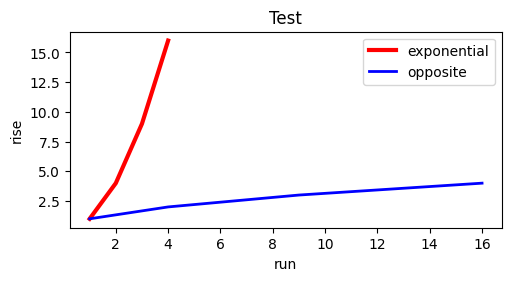

In [4]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.figure(figsize=(5, 2.7), layout="constrained")
plt.title("Test")
plt.xlabel("run")
plt.ylabel("rise")
plt.plot(x, y, label="exponential", color="red", linewidth=3)
plt.plot(y, x, label="opposite", color="blue", linewidth=2)
plt.legend()
plt.show()